# Imports

In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('./Data/full_sample_clean.csv', sep=',', index_col=0)

# Recruitment

In [41]:
print(f'{len(df.subject.unique())} participants completed the task')
print(f'Before exclusions, {len(df.loc[df.group == "neurotypical"].subject.unique())} are in the neurotypical group.')
print(f'After exclusions {len(df.loc[(df.in_sample == True)&(df.group=="neurotypical")].subject.unique())} subjects ({(len(df.loc[(df.in_sample == True)&(df.group=="neurotypical")].subject.unique())/len(df.loc[df.group=="neurotypical"].subject.unique())) * 100 :.3} %)remain in the neurotypical sample')
print(f'Before exclusions, {len(df.loc[df.group == "autism"].subject.unique())} are in the autism, group.')
print(f'After exclusions,  {len(df.loc[(df.in_sample == True)&(df.group=="autism")].subject.unique())} subjects ({(len(df.loc[(df.in_sample == True)&(df.group=="autism")].subject.unique())/len(df.loc[df.group=="autism"].subject.unique())) * 100 :.3} %)remain in the autism sample')

1058 participants completed the task
Before exclusions, 501 are in the neurotypical group.
After exclusions 389 subjects (77.6 %)remain in the neurotypical sample
Before exclusions, 557 are in the autism, group.
After exclusions,  222 subjects (39.9 %)remain in the autism sample


# Demographics

## Age x Group

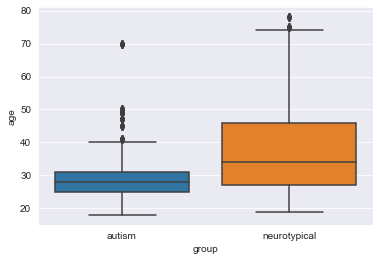

In [4]:
g = sns.boxplot(data=df.loc[df.in_sample==True], y="age", x='group');

## Age x Gender

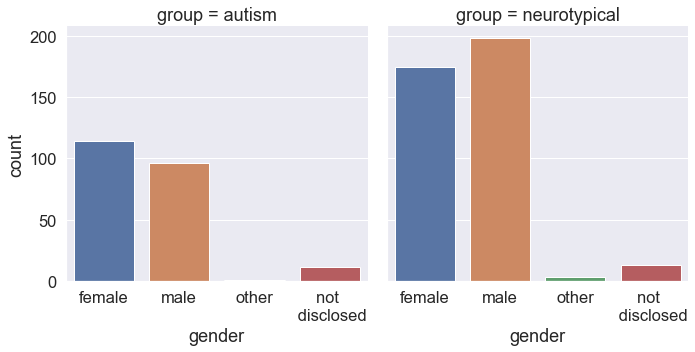

In [5]:
xx = df.loc[df.in_sample == True,].groupby(['subject','gender','group']).size()
xx = xx.reset_index()
sns.set(font_scale=1.5)
g = sns.catplot(data=xx, x='gender', col='group', kind='count');
#g.fig.set_size_inches((8, 5))
g.axes[0][0].set_xticklabels(['female', 'male', 'other', 'not \n disclosed']);
#plt.legend(bbox_to_anchor=(.02, 1), loc='upper left', borderaxespad=0);
#plt.savefig('./Figures/genderxgroup.png', dpi=300)

## Age x RT x Group

<ipython-input-6-26177eeeec9b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_a = df.loc[df.in_sample == True].groupby(['subject', 'group']).mean()


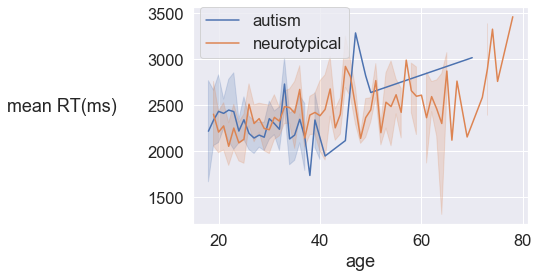

In [6]:
df_a = df.loc[df.in_sample == True].groupby(['subject', 'group']).mean()
dd_a = df_a.reset_index().sort_values('subject')
sns.lineplot(x='age', y='rt', hue='group', data=df_a);
plt.legend(bbox_to_anchor=(.02, 1), loc='upper left', borderaxespad=0);
plt.ylabel('mean RT(ms)', labelpad=85, rotation=0);

# Accuracy

## Group x Ascription

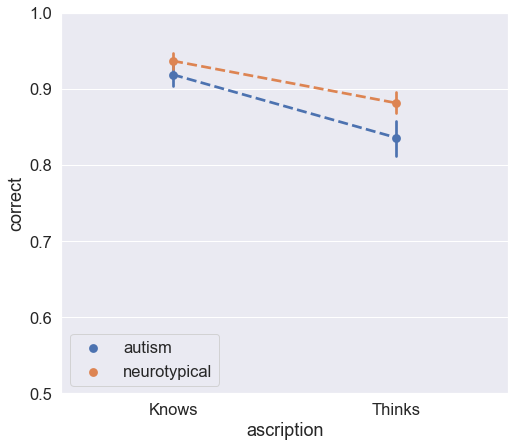

In [7]:
acc= df.loc[df.in_sample==True].groupby(['subject', 'group', 'ascription', 'agent_state']).correct.mean()
acc = acc.reset_index()
fig, ax = plt.subplots(figsize=(8,7))
sns.pointplot(hue='group', y='correct', x='ascription', data=acc, linestyles='--');
plt.ylim([.5, 1]);
plt.legend(bbox_to_anchor=(.02, .02), loc='lower left', borderaxespad=0);

#plt.savefig('./Figures/acc_groupxascipt.png', dpi=300)

## Group x Agent State x Ascription

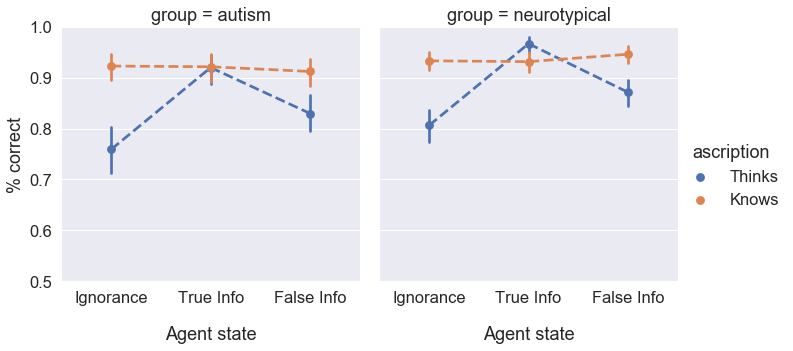

In [8]:
sns.set(font_scale=1.5)
g = sns.catplot(hue='ascription', x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y='correct', hue_order=['Thinks', 'Knows'], data=acc, col='group', kind='point', linestyles='--');
g.set(ylim=(.5, 1));

for aa in [0, 1]:
    g.axes[0][aa].yaxis.set_label_text("% correct");
    g.axes[0][aa].xaxis.set_label_text("Agent state");
    g.axes[0][aa].xaxis.labelpad = 20;

#plt.savefig('./Figures/groupxagentxascrip.png')

### Does this effect appear in prior studies?

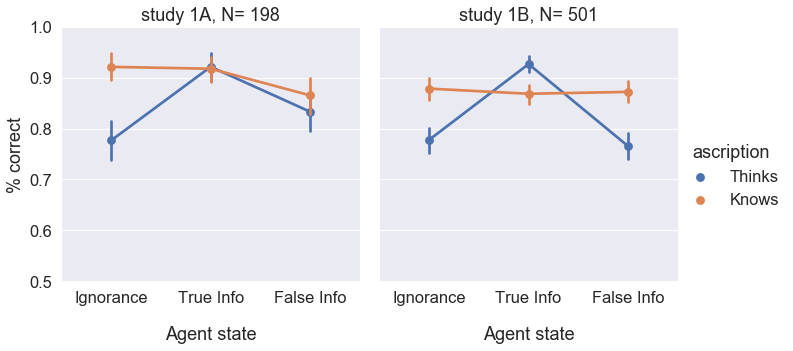

In [9]:
e1adat = pd.read_csv('../OldSharedFiles/knowledgeBeforeBelief/data/study1a.csv', header=0)
e1adat['group'] = 'study 1A'
e1bdat = pd.read_csv('../OldSharedFiles/knowledgeBeforeBelief/data/study1b.csv', header=0)
e1bdat['group'] = 'study 1B'
e1dat = pd.concat([e1adat, e1bdat], ignore_index=True)
e1dat = e1dat.loc[e1dat.condition != 'D']
e1dat.sort_values('subj')
#sdat = e1dat.loc[e1dat.subj == e1dat.subj.unique()[10]]
e1dat['ascription'] = ['Thinks' if int(x) == 0 else 'Knows'  for x in e1dat.question]
for v, cond in zip(sorted(e1dat.condition.unique()),['True Info', 'False Info', 'Ignorance', 'True Info', 'False Info', 'Ignorance']):
    e1dat.loc[e1dat.condition == v, 'agent_state'] = cond

for v, cond in zip(sorted(e1dat.response.unique()), [False, True]):
    e1dat.loc[e1dat.response == v, 'resp'] = cond

e1dat['correct_answer'] = False
e1dat.loc[e1dat.agent_state == 'True Info', 'correct_answer'] = True
e1dat['correct'] = e1dat.apply(lambda row: row['resp'] == row['correct_answer'], axis=1)
sns.set(font_scale=1.5)
g = sns.catplot(x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y='correct', hue='ascription', hue_order=['Thinks', 'Knows'], col='group', kind='point', data=e1dat, aspect=1);
g.set(ylim=(.5, 1));
for aa in [0, 1]:
    g.axes[0][aa].yaxis.set_label_text("% correct");
    g.axes[0][aa].xaxis.set_label_text("Agent state");
    g.axes[0][aa].xaxis.labelpad = 20;

g.axes[0][0].title.set_text(f'study 1A, N= {len(e1dat.loc[e1dat.group=="study 1A"].subj.unique())}');
g.axes[0][1].title.set_text(f'study 1B, N= {len(e1dat.loc[e1dat.group=="study 1B"].subj.unique())}');

## Accuracy x Item

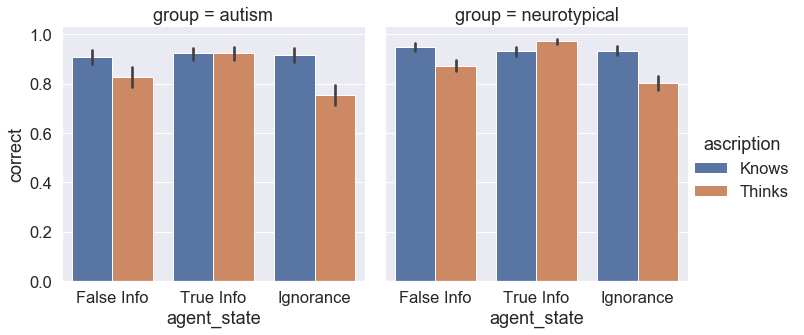

In [11]:
sns.catplot(x='agent_state', y='correct', col='group', hue='ascription', kind='bar', data=df.loc[df.in_sample == True]);

# Autism Quotient

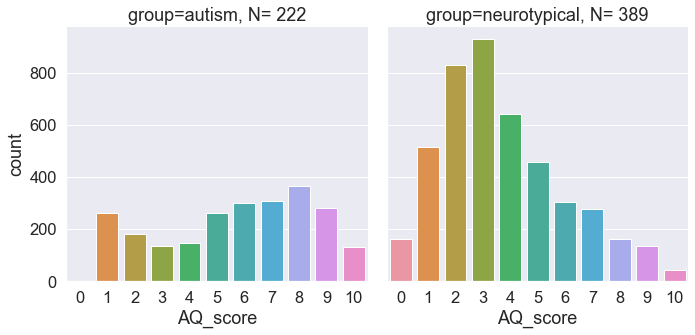

In [12]:
g = sns.catplot(data=df.loc[df.in_sample==True], x='AQ_score', col='group', kind='count');

g.axes[0][0].title.set_text(f'group=autism, N= {len(df.loc[(df.in_sample == True)&(df.group == "autism")].subject.unique())}');
g.axes[0][1].title.set_text(f'group=neurotypical, N= {len(df.loc[(df.in_sample == True)&(df.group == "neurotypical")].subject.unique())}');
#plt.savefig('./Figures/group_aq10.png', dpi=300)

In [3]:

aq = {'rt_thinks':[], 'rt_knows':[], 'pid':[],'rt_diff':[], 'group':[], 'aq_score': [], 'age':[] }
for subj in tqdm(df.loc[df.in_sample==True].subject.unique()):
    sdat = df.loc[(df.subject == subj) & (df.correct==True) & (df.in_sample==True)]
    tt = sdat.loc[sdat.ascription == 'Thinks'].rt.mean()
    kk = sdat.loc[sdat.ascription == 'Knows'].rt.mean()
    for var, val in zip(sorted(list(aq.keys())), [sdat.age.values[0],sdat.AQ_score.values[0], sdat.group.values[0],subj, tt-kk, kk, tt ]):
        aq[var].append(val)

aqdf = pd.DataFrame(aq)

100%|██████████| 611/611 [00:01<00:00, 384.30it/s]


In [4]:
aqdf.to_csv("./Data/aqrtdiffs.csv", sep=',', header=True)

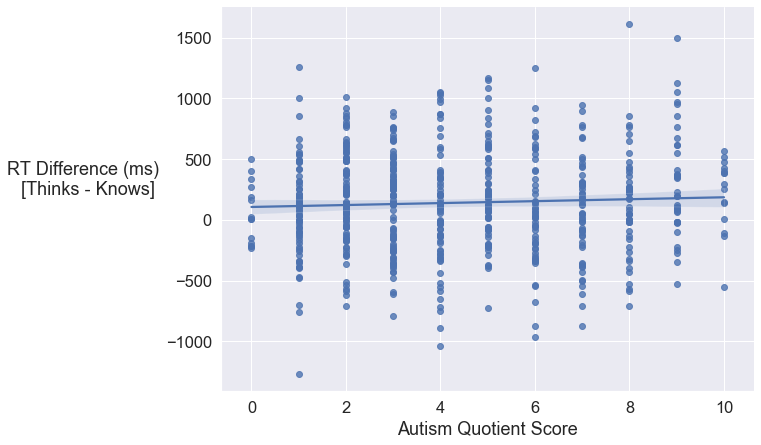

In [14]:
g = sns.lmplot(x='aq_score', y='rt_diff', y_partial='age',  data=aqdf, markers=None);
g.set_axis_labels(y_var='RT Difference (ms) \n [Thinks - Knows]', rotation=0, labelpad=80)
g.fig.set_size_inches((11, 7))
g.set_axis_labels(x_var='Autism Quotient Score')
#plt.savefig('./Figures/rt_diffxAQxgroup.png', dpi=300)

<ipython-input-21-b24aef25267f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  xx= df.loc[(df.in_sample == True) & (df.correct==True)].groupby('subject').mean()


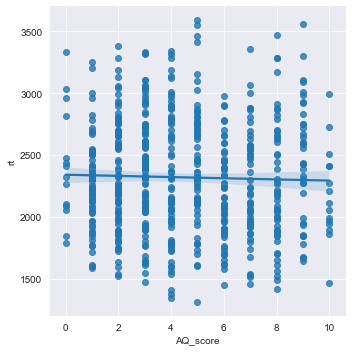

In [21]:
xx= df.loc[(df.in_sample == True) & (df.correct==True)].groupby('subject').mean()
xx.reset_index(inplace=True)
#sns.scatterplot(x=jitter(xx['AQ_score'], 0), y='rt',  data=xx)
sns.lmplot(x='AQ_score', y='rt',  data=xx)

# Felicity Judgements

In [6]:
def jitter(values,j):
    return values + np.random.normal(j,0.15,values.shape)

## Group x Agent x Ascription

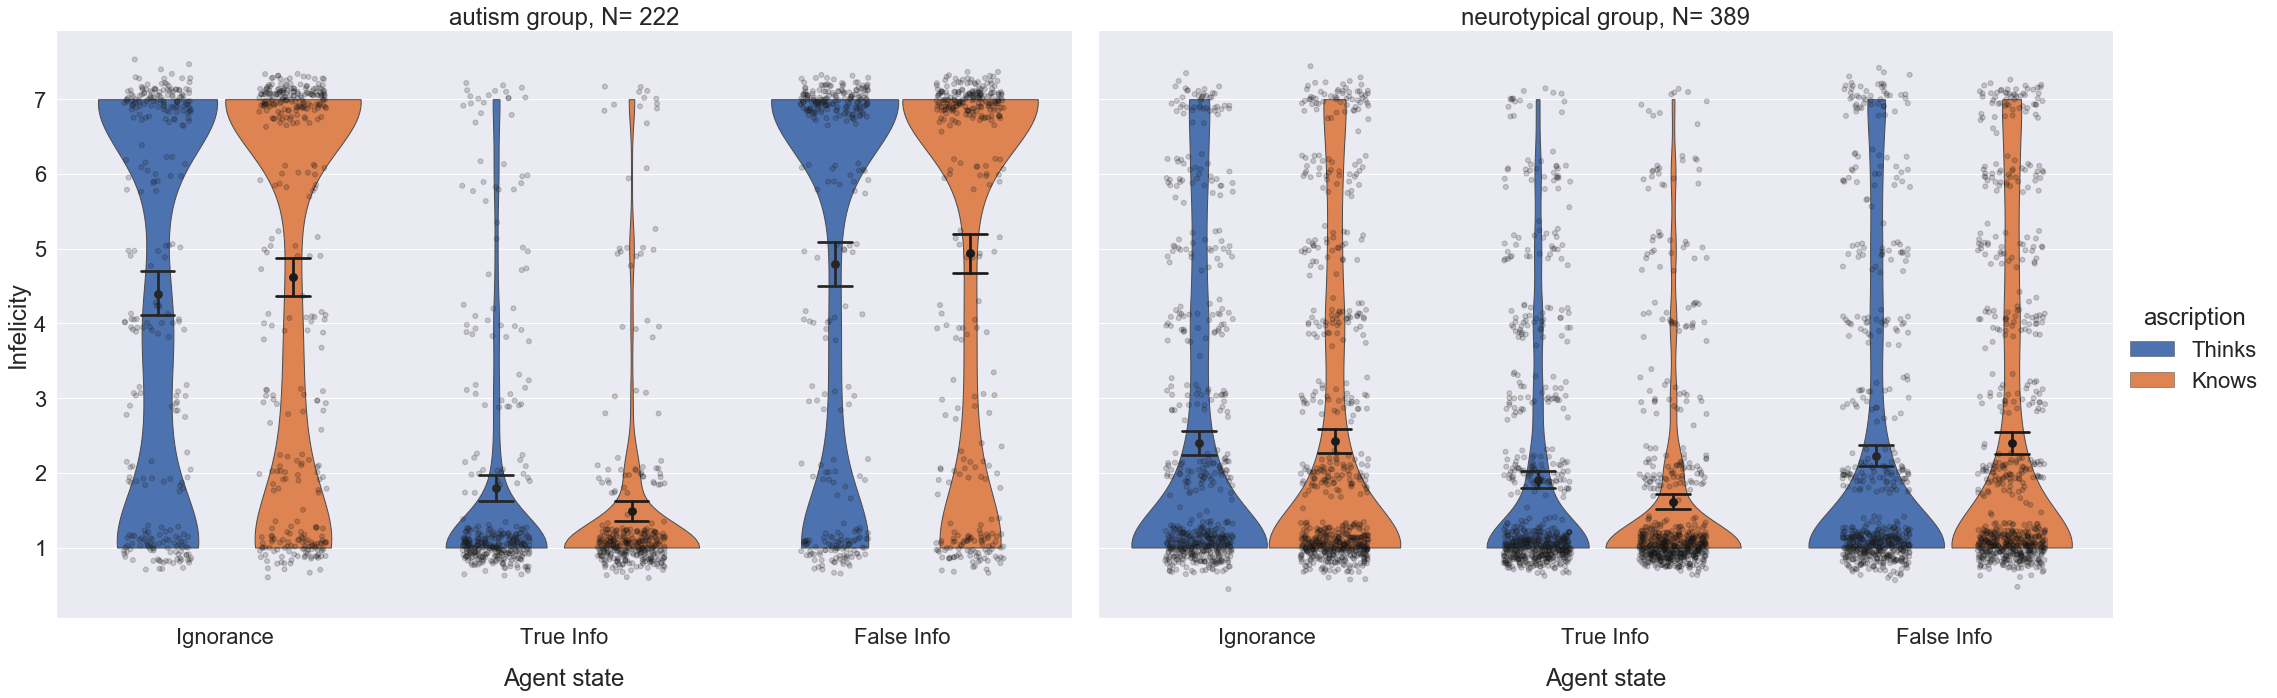

In [46]:
sns.set(font_scale=2)

f1 = df.loc[(df.group== 'autism') & (df.in_sample==True) & (df.correct == True)]
f2 = df.loc[(df.group== 'neurotypical') & (df.in_sample==True)& (df.correct == True)]

gg = sns.catplot(x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y='infelicity', hue='ascription', hue_order=['Thinks', 'Knows'], kind='violin', col='group', cut=0, data=df.loc[(df.in_sample == True)& (df.correct == True)], inner=None, bw=.25, linewidth=1, saturation=1, height=10, aspect=1.5);

sns.stripplot(x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y=jitter(f1['infelicity'], 0), hue='ascription', hue_order=['Thinks', 'Knows'], data=f1, color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.2, ax=gg.axes[0][0]);

sns.stripplot(x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y=jitter(f2['infelicity'], 0), hue='ascription', hue_order=['Thinks', 'Knows'], data=f2, color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.2, ax=gg.axes[0][1]);

sns.pointplot(x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y=jitter(f1['infelicity'], 0), hue='ascription', hue_order=['Thinks', 'Knows'], data=f1, join=False, dodge=.4, capsize=.1, ax=gg.axes[0][0], color='k',);

sns.pointplot(x='agent_state', order=['Ignorance', 'True Info', 'False Info'], y=jitter(f2['infelicity'], 0), hue='ascription', hue_order=['Thinks', 'Knows'], data=f2, join=False, dodge=.4, capsize=.1, ax=gg.axes[0][1], color='k',);


#ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2])
for aa in [0, 1]:
    gg.axes[0][aa].yaxis.set_label_text("Infelicity")
    gg.axes[0][aa].xaxis.set_label_text("Agent state")
    gg.axes[0][aa].xaxis.labelpad = 20
    gg.axes[0][aa].legend_.remove()

gg.axes[0][0].title.set_text(f'autism group, N= {len(df.loc[(df.group=="autism") &(df.in_sample==True)].subject.unique())}')
gg.axes[0][1].title.set_text(f'neurotypical group, N= {len(df.loc[(df.group=="neurotypical") &(df.in_sample==True)].subject.unique())}')

plt.savefig('./Figures/grpxagntxascrpt_fel.png', dpi=500)

## Group x Agent

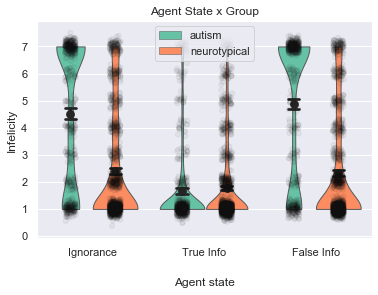

In [51]:
## Agent state x Group
sns.set(font_scale=1)
g = sns.violinplot(x='agent_state', y='infelicity', order=['Ignorance', 'True Info', 'False Info'], hue='group', kind='violin',
                   cut=0, col='group', inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1,
                   data=df.loc[(df.correct == True) & (df.in_sample == True)], palette="Set2");

sns.stripplot(x='agent_state', y=jitter(df.loc[(df.in_sample == True) & (df.correct == True), 'infelicity'], 0), order=['Ignorance', 'True Info', 'False Info'], hue='group', color='k',
              dodge=True, jitter=.1, linewidth=1, alpha=.05, ax=g.axes,
              data=df.loc[(df.in_sample == True) & (df.correct == True)]).legend_.remove();

sns.pointplot(x='agent_state', y='infelicity', order=['Ignorance', 'True Info', 'False Info'], hue='group', join=False,
              dodge=.4, capsize=.1, ax=g.axes, color='k', data=df.loc[(df.in_sample == True) & (df.correct == True)]);

g.axes.yaxis.set_label_text("Infelicity")
g.axes.xaxis.set_label_text("Agent state")
g.axes.xaxis.labelpad = 20
plt.legend(handles=g.axes.legend_.legendHandles[:2]);
plt.title(f'Agent State x Group');
plt.savefig('./Figures/agntxgrp_fel.png', dpi=300)

## Agent x Ascription

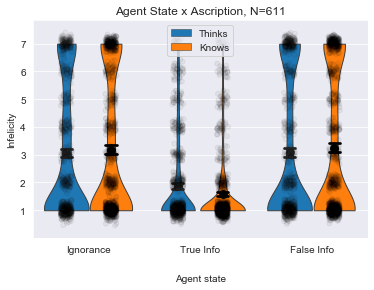

In [7]:
g = sns.violinplot(x='agent_state', y='infelicity', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], kind='violin',cut=0, inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True) & (df.in_sample == True)]);

sns.stripplot(x='agent_state', y=jitter(df.loc[(df.in_sample == True) & (df.correct == True), 'infelicity'], 0), order=['Ignorance', 'True Info', 'False Info'], hue='ascription',hue_order=['Thinks', 'Knows'], color='k',
              dodge=True, jitter=.1, linewidth=1, alpha=.05, ax=g.axes,
              data=df.loc[(df.in_sample == True) & (df.correct == True)]).legend_.remove();

sns.pointplot(x='agent_state', y='infelicity', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], join=False,
              dodge=.4, capsize=.1, ax=g.axes, color='k', data=df.loc[(df.in_sample == True) & (df.correct == True)]);

g.axes.yaxis.set_label_text("Infelicity")
g.axes.xaxis.set_label_text("Agent state")
g.axes.xaxis.labelpad = 20
plt.legend(handles=g.axes.legend_.legendHandles[:2]);
plt.title(f'Agent State x Ascription, N={len(df.loc[(df.in_sample == True) & (df.correct == True)].subject.unique())}');
plt.savefig('./Figures/agntxascrpt_fel.png', dpi=300)

## Group x Ascription

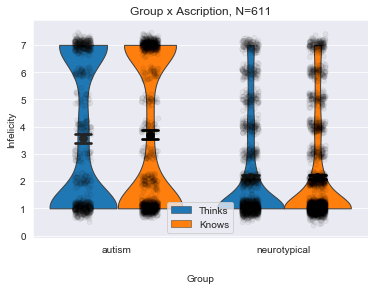

In [10]:
g = sns.violinplot(x='group', y='infelicity', hue='ascription', hue_order=['Thinks', 'Knows'], kind='violin',cut=0, inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True) & (df.in_sample == True)]);

sns.stripplot(x='group', y=jitter(df.loc[(df.in_sample == True) & (df.correct == True), 'infelicity'], 0), hue='ascription',hue_order=['Thinks', 'Knows'], color='k',
              dodge=True, jitter=.1, linewidth=1, alpha=.05, ax=g.axes,
              data=df.loc[(df.in_sample == True) & (df.correct == True)]).legend_.remove();

sns.pointplot(x='group', y='infelicity', hue='ascription', hue_order=['Thinks', 'Knows'], join=False,
              dodge=.4, capsize=.1, ax=g.axes, color='k', data=df.loc[(df.in_sample == True) & (df.correct == True)]);

g.axes.yaxis.set_label_text("Infelicity")
g.axes.xaxis.set_label_text("Group")
g.axes.xaxis.labelpad = 20
plt.legend(handles=g.axes.legend_.legendHandles[:2]);
plt.title(f'Group x Ascription, N={len(df.loc[(df.in_sample == True) & (df.correct == True)].subject.unique())}');
plt.savefig('./Figures/grpxascrpt_fel.png', dpi=300)
#

## Infelicity x Ascription

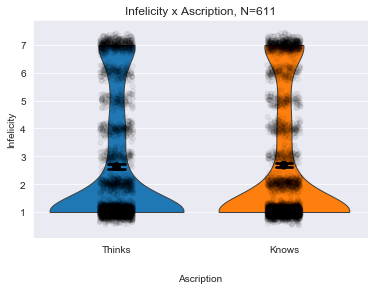

In [14]:
g = sns.violinplot(x='ascription', y='infelicity', order=['Thinks', 'Knows'], kind='violin',cut=0, inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True) & (df.in_sample == True)]);

sns.stripplot(x='ascription', y=jitter(df.loc[(df.in_sample == True) & (df.correct == True), 'infelicity'], 0), order=['Thinks', 'Knows'], color='k',
              dodge=True, jitter=.1, linewidth=1, alpha=.05, ax=g.axes,
              data=df.loc[(df.in_sample == True) & (df.correct == True)]);#.legend_.remove();

sns.pointplot(x='ascription', y='infelicity', order=['Thinks', 'Knows'], join=False,
              dodge=.4, capsize=.1, ax=g.axes, color='k', data=df.loc[(df.in_sample == True) & (df.correct == True)]);

g.axes.yaxis.set_label_text("Infelicity")
g.axes.xaxis.set_label_text("Ascription")
g.axes.xaxis.labelpad = 20
#plt.legend(handles=g.axes.legend_.legendHandles[:2]);
plt.title(f'Infelicity x Ascription, N={len(df.loc[(df.in_sample == True) & (df.correct == True)].subject.unique())}');
plt.savefig('./Figures/felxascrpt.png', dpi=300)
#

## infelicity x agent

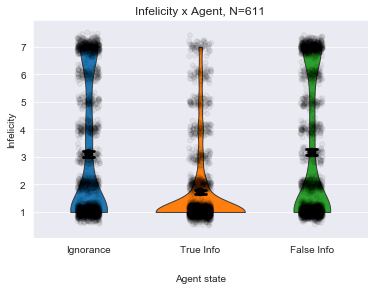

In [8]:
g = sns.violinplot(x='agent_state', y='infelicity', order=['Ignorance', 'True Info', 'False Info'], kind='violin',cut=0, inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True) & (df.in_sample == True)]);

sns.stripplot(x='agent_state', y=jitter(df.loc[(df.in_sample == True) & (df.correct == True), 'infelicity'], 0), order=['Ignorance', 'True Info', 'False Info'], color='k',
              dodge=True, jitter=.1, linewidth=1, alpha=.05, ax=g.axes,
              data=df.loc[(df.in_sample == True) & (df.correct == True)])#.legend_.remove();

sns.pointplot(x='agent_state', y='infelicity', order=['Ignorance', 'True Info', 'False Info'], join=False,
              dodge=.4, capsize=.1, ax=g.axes, color='k', data=df.loc[(df.in_sample == True) & (df.correct == True)]);

g.axes.yaxis.set_label_text("Infelicity")
g.axes.xaxis.set_label_text("Agent state")
g.axes.xaxis.labelpad = 20
#plt.legend(handles=g.axes.legend_.legendHandles[:2]);
plt.title(f'Infelicity x Agent, N={len(df.loc[(df.in_sample == True) & (df.correct == True)].subject.unique())}');
plt.savefig('./Figures/agnt_fel.png', dpi=300)
#

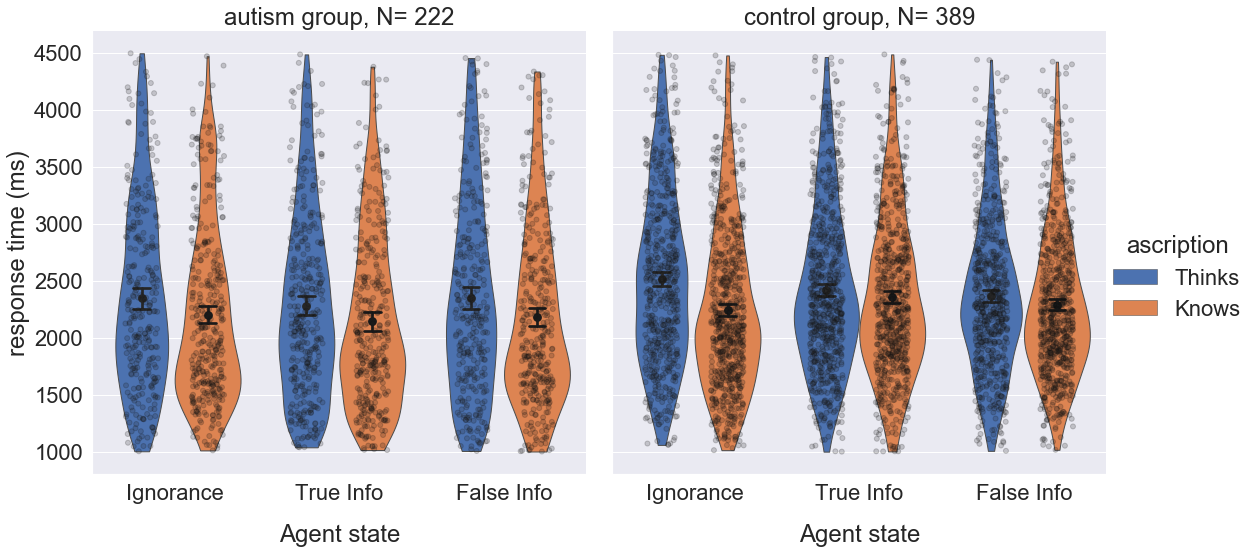

In [17]:

sns.set(font_scale=2)
g = sns.catplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'] ,kind='violin', cut=0,col='group', inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True)]);

sns.stripplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.2, ax=g.axes[0][0], data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'autism')]);

sns.stripplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription',  hue_order=['Thinks', 'Knows'],color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.2, ax=g.axes[0][1], data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'neurotypical')]);

sns.pointplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes[0][0], color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'autism')]);

sns.pointplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes[0][1], color='k', data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'neurotypical')]);


for aa in [0, 1]:
    g.axes[0][aa].yaxis.set_label_text("response time (ms)")
    g.axes[0][aa].xaxis.set_label_text("Agent state")
    g.axes[0][aa].xaxis.labelpad = 20
    g.axes[0][aa].legend_.remove()

g.axes[0][0].title.set_text(f'autism group, N= {len(df.loc[(df.in_sample==True)& (df.group == "autism")].subject.unique())}')
g.axes[0][1].title.set_text(f'control group, N= {len(df.loc[(df.in_sample==True)& (df.group == "neurotypical")].subject.unique())}')

#plt.savefig('./Figures/groupxascrip_rt.png', dpi=400)

# RT
## Agent State x Ascription

Text(0.5, 1.0, 'Agent State x Ascription, N=611')

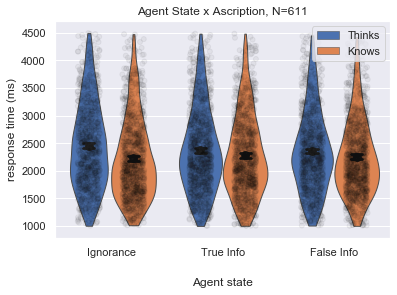

In [18]:
sns.set(font_scale=1)
g = sns.violinplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'] ,kind='violin', cut=0,col='group', inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True)]);

sns.stripplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.05, ax=g.axes, data=df.loc[(df.in_sample==True)& (df.correct ==True)]).legend_.remove();


sns.pointplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes, color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True)]);

g.axes.yaxis.set_label_text("response time (ms)")
g.axes.xaxis.set_label_text("Agent state")
g.axes.xaxis.labelpad = 20
plt.legend(handles=g.axes.legend_.legendHandles[:2])
plt.title(f'Agent State x Ascription, N={len(df.loc[df.in_sample==True].subject.unique())}')
#plt.savefig('./Figures/agentxasript.png', dpi=300)


### Agent State x Ascription - Neurotypical

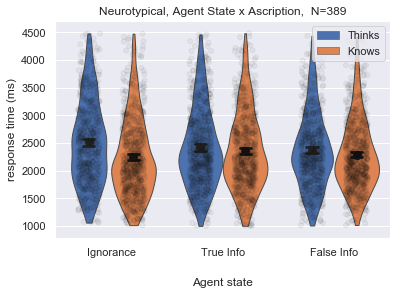

In [19]:
sns.set(font_scale=1)
g = sns.violinplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'] ,kind='violin', cut=0,col='group', inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True)&(df.group == 'neurotypical')]);

sns.stripplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.05, ax=g.axes, data=df.loc[(df.in_sample==True)& (df.correct ==True)&(df.group == 'neurotypical')]).legend_.remove();


sns.pointplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes, color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True)&(df.group == 'neurotypical')]);

g.axes.yaxis.set_label_text("response time (ms)")
g.axes.xaxis.set_label_text("Agent state")
g.axes.xaxis.labelpad = 20
plt.legend(handles=g.axes.legend_.legendHandles[:2])
plt.title(f'Neurotypical, Agent State x Ascription,  N={len(df.loc[(df.in_sample==True)&(df.group == "neurotypical")].subject.unique())}');
plt.savefig('./Figures/agentxasript_nt.png', dpi=300)


### Agent State x Ascription - Autism


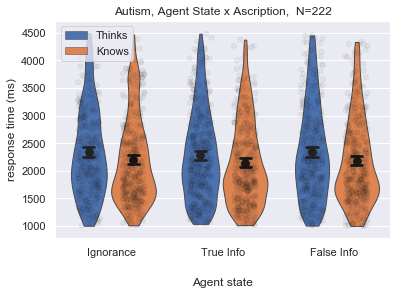

In [20]:
sns.set(font_scale=1)
g = sns.violinplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'] ,kind='violin', cut=0,col='group', inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True)&(df.group == 'autism')]);

sns.stripplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.05, ax=g.axes, data=df.loc[(df.in_sample==True)& (df.correct ==True)&(df.group == 'autism')]).legend_.remove();


sns.pointplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='ascription', hue_order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes, color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True)&(df.group == 'autism')]);

g.axes.yaxis.set_label_text("response time (ms)")
g.axes.xaxis.set_label_text("Agent state")
g.axes.xaxis.labelpad = 20
plt.legend(handles=g.axes.legend_.legendHandles[:2])
plt.title(f'Autism, Agent State x Ascription,  N={len(df.loc[(df.in_sample==True)&(df.group == "autism")].subject.unique())}');
#plt.savefig('./Figures/agentxascript_asd.png', dpi=300)

## Group x Ascription

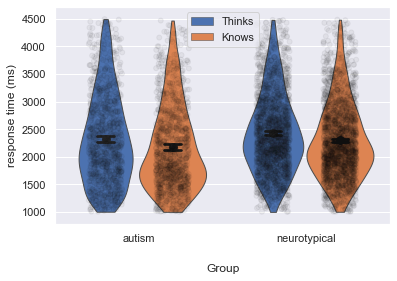

In [21]:
sns.set(font_scale=1)
g = sns.violinplot(x='group', y='rt', hue='ascription', hue_order=['Thinks', 'Knows'] ,kind='violin', cut=0, inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True)]);

sns.stripplot(x='group', y='rt', hue='ascription', hue_order=['Thinks', 'Knows'], color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.05, ax=g.axes, data=df.loc[(df.in_sample==True)& (df.correct ==True)]).legend_.remove();


sns.pointplot(x='group', y='rt', hue='ascription', hue_order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes, color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True)]);

g.axes.yaxis.set_label_text("response time (ms)")
g.axes.xaxis.set_label_text("Group")
g.axes.xaxis.labelpad = 20
plt.legend(handles=g.axes.legend_.legendHandles[:2]);
#plt.title(f'Group x Ascription')
#plt.savefig('./Figures/groupxascript.png', dpi=300)


### Ascription - Neurotypicals


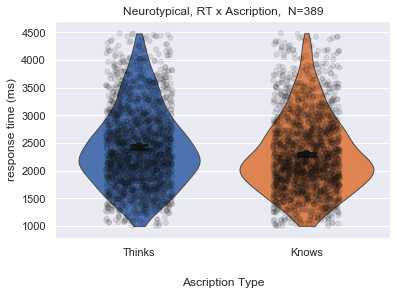

In [49]:
sns.set(font_scale=1)
g = sns.violinplot( y='rt', x='ascription', order=['Thinks', 'Knows'] ,kind='violin', cut=0, inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True) & (df.group == 'neurotypical')]);

sns.stripplot(y='rt', x='ascription', order=['Thinks', 'Knows'], color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.1, ax=g.axes, data=df.loc[(df.in_sample==True)& (df.correct ==True)& (df.group == 'neurotypical')]);


sns.pointplot(y='rt', x='ascription', order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes, color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'neurotypical')]);

g.axes.yaxis.set_label_text("response time (ms)")
g.axes.xaxis.set_label_text("Ascription Type")
g.axes.xaxis.labelpad = 20
#plt.legend(handles=g.axes.legend_.legendHandles[:2]);
plt.title(f'Neurotypical, RT x Ascription,  N={len(df.loc[(df.in_sample==True)&(df.group == "neurotypical")].subject.unique())}');
plt.savefig('./Figures/ascript_nt.png', dpi=300)


### Ascription - ASD

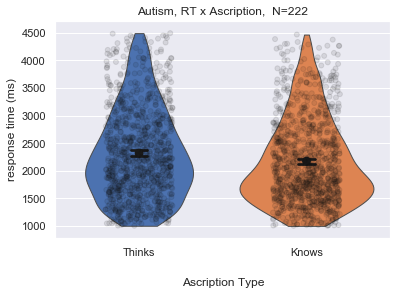

In [48]:
sns.set(font_scale=1)
g = sns.violinplot( y='rt', x='ascription', order=['Thinks', 'Knows'] ,kind='violin', cut=0, inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True) & (df.group == 'autism')]);

sns.stripplot(y='rt', x='ascription', order=['Thinks', 'Knows'], color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.1, ax=g.axes, data=df.loc[(df.in_sample==True)& (df.correct ==True)& (df.group == 'autism')]);


sns.pointplot(y='rt', x='ascription', order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes, color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'autism')]);

g.axes.yaxis.set_label_text("response time (ms)")
g.axes.xaxis.set_label_text("Ascription Type")
g.axes.xaxis.labelpad = 20
#plt.legend(handles=g.axes.legend_.legendHandles[:2]);
plt.title(f'Autism, RT x Ascription,  N={len(df.loc[(df.in_sample==True)&(df.group == "autism")].subject.unique())}');
plt.savefig('./Figures/ascript_asd.png', dpi=300)


## Agent state x Group

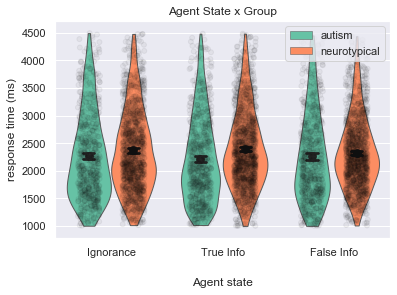

In [23]:

g = sns.violinplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='group',kind='violin', cut=0,col='group', inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True)], palette="Set2");

sns.stripplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='group', color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.05, ax=g.axes, data=df.loc[(df.in_sample==True)& (df.correct ==True)]).legend_.remove();


sns.pointplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], hue='group', join=False, dodge=.4, capsize=.1, ax=g.axes, color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True)]);

g.axes.yaxis.set_label_text("response time (ms)")
g.axes.xaxis.set_label_text("Agent state")
g.axes.xaxis.labelpad = 20
plt.legend(handles=g.axes.legend_.legendHandles[:2]);
plt.title(f'Agent State x Group');
#plt.savefig('./Figures/agentxasript.png', dpi=300)


###  Agent State -NT

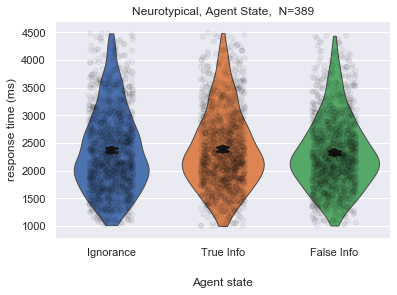

In [24]:
sns.set(font_scale=1)
sns.color_palette()

#sns.color_palette("Set2")

g = sns.violinplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'],kind='violin', cut=0, inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True)&(df.group=='neurotypical')]);

sns.stripplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.05, ax=g.axes, data=df.loc[(df.in_sample==True)& (df.correct ==True)&(df.group=='neurotypical')]);


sns.pointplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], join=False, dodge=.4, capsize=.1, ax=g.axes, color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True)&(df.group=='neurotypical')]);

g.axes.yaxis.set_label_text("response time (ms)")
g.axes.xaxis.set_label_text("Agent state")
g.axes.xaxis.labelpad = 20
#plt.legend(handles=g.axes.legend_.legendHandles[:2])
plt.title(f'Neurotypical, Agent State,  N={len(df.loc[(df.in_sample==True)&(df.group == "neurotypical")].subject.unique())}');

#plt.savefig('./Figures/agentxasript.png', dpi=300)
#plt.legend(handles=g.axes.legend_.legendHandles[:2])
#plt.title(f'Group x Ascription')
#plt.savefig('./Figures/agent_nt.png', dpi=300)

### Agent State - ASD

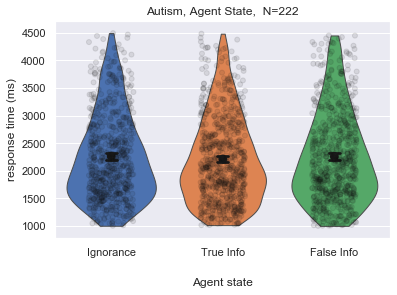

In [46]:
sns.set(font_scale=1)
sns.color_palette()

#sns.color_palette("Set2")

g = sns.violinplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'],kind='violin', cut=0, inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True)&(df.group=='autism')]);

sns.stripplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.1, ax=g.axes, data=df.loc[(df.in_sample==True)& (df.correct ==True)&(df.group=='autism')]);


sns.pointplot(x='agent_state', y='rt', order=['Ignorance', 'True Info', 'False Info'], join=False, dodge=.4, capsize=.1, ax=g.axes, color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True)&(df.group=='autism')]);

g.axes.yaxis.set_label_text("response time (ms)")
g.axes.xaxis.set_label_text("Agent state")
g.axes.xaxis.labelpad = 20
#plt.legend(handles=g.axes.legend_.legendHandles[:2])
plt.title(f'Autism, Agent State,  N={len(df.loc[(df.in_sample==True)&(df.group == "autism")].subject.unique())}');

#plt.legend(handles=g.axes.legend_.legendHandles[:2])
#plt.title(f'Group x Ascription')
plt.savefig('./Figures/agent_asd.png', dpi=300)

# RT x Felicity

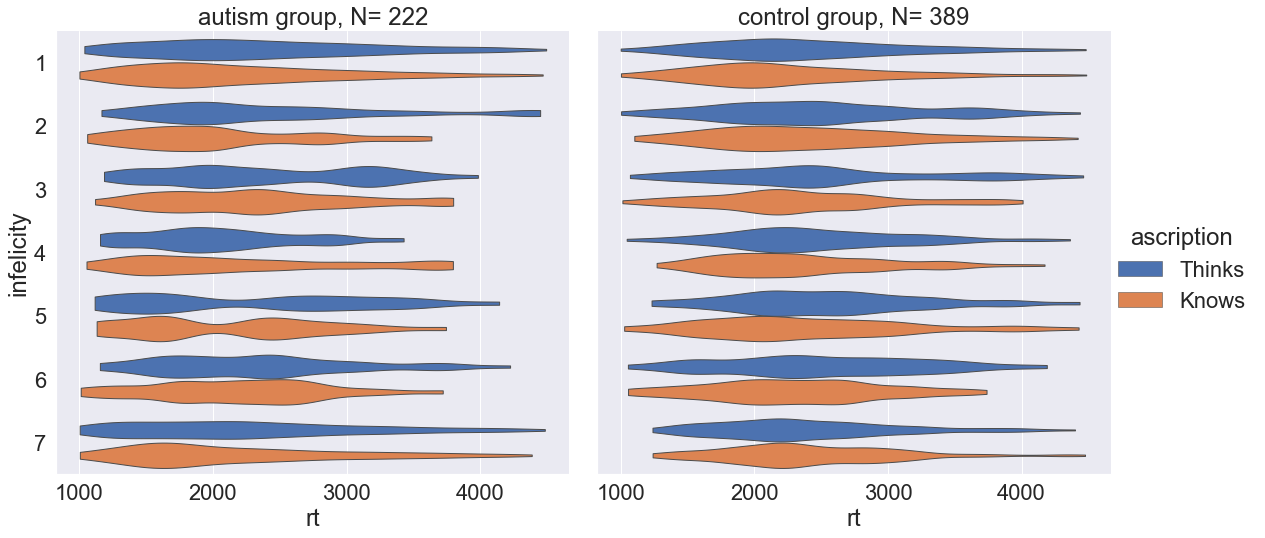

In [14]:
sns.set(font_scale=2)
g = sns.catplot(x='rt', y='infelicity', hue='ascription', hue_order=['Thinks', 'Knows'] ,kind='violin', cut=0,col='group', inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True)], orient="h");
'''
sns.stripplot(x='rt', y='infelicity', hue='ascription', hue_order=['Thinks', 'Knows'], color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.2, ax=g.axes[0][0], data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'autism')]);

sns.stripplot(x='rt', y='infelicity', hue='ascription',  hue_order=['Thinks', 'Knows'],color='k', dodge=True,  jitter=.2, linewidth=1, alpha=.2, ax=g.axes[0][1], data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'neurotypical')]);

sns.pointplot(x='rt', y='infelicity', hue='ascription', hue_order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes[0][0], color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'autism')]);

sns.pointplot(x='rt', y='infelicity', hue='ascription', hue_order=['Thinks', 'Knows'], join=False, dodge=.4, capsize=.1, ax=g.axes[0][1], color='k', data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'neurotypical')]);


for aa in [0, 1]:
    g.axes[0][aa].yaxis.set_label_text("Infelicity")
    g.axes[0][aa].xaxis.set_label_text("Response Time")
    g.axes[0][aa].xaxis.labelpad = 20
    g.axes[0][aa].legend_.remove()
'''
g.axes[0][0].title.set_text(f'autism group, N= {len(df.loc[(df.in_sample==True)& (df.group == "autism")].subject.unique())}')
g.axes[0][1].title.set_text(f'control group, N= {len(df.loc[(df.in_sample==True)& (df.group == "neurotypical")].subject.unique())}')

#plt.savefig('./Figures/groupxascrip_rt.png', dpi=400)

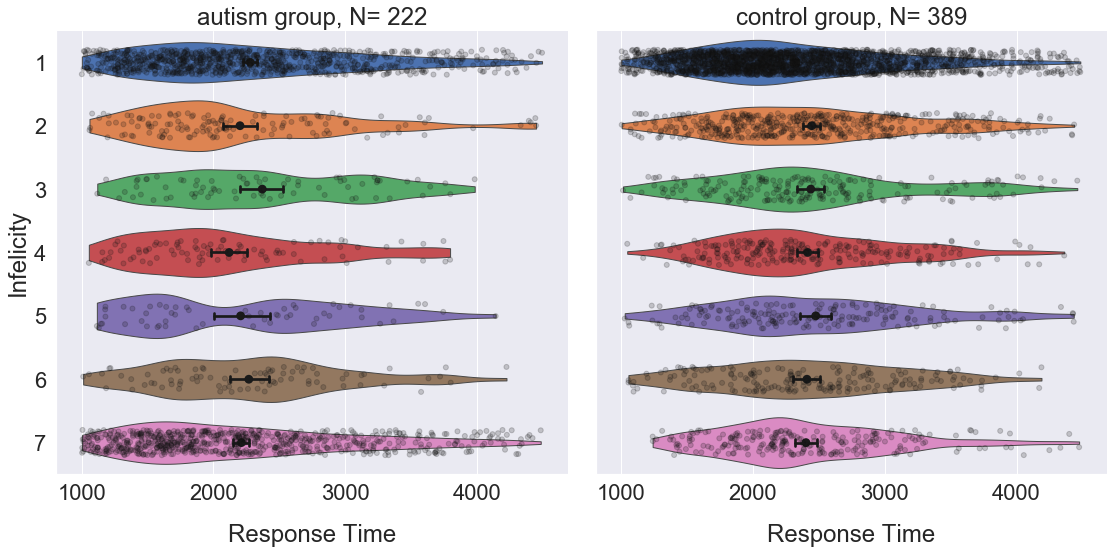

In [8]:
sns.set(font_scale=2)
g = sns.catplot(x='rt', y='infelicity',kind='violin', cut=0,col='group', inner=None, bw=.25, linewidth=1, saturation=1, height=8, aspect=1, data=df.loc[(df.correct == True)&(df.in_sample==True)], orient="h");

sns.stripplot(x='rt', y='infelicity', color='k', orient="h",  jitter=.2, linewidth=1, alpha=.2, ax=g.axes[0][0], data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'autism')]);

sns.stripplot(x='rt', y='infelicity', color='k', orient="h",  jitter=.2, linewidth=1, alpha=.2, ax=g.axes[0][1], data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'neurotypical')]);

sns.pointplot(x='rt', y='infelicity', join=False, orient="h", capsize=.1, ax=g.axes[0][0], color='k', data =df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'autism')]);

sns.pointplot(x='rt', y='infelicity', join=False, orient="h", capsize=.1, ax=g.axes[0][1], color='k', data=df.loc[(df.in_sample==True)& (df.correct ==True) & (df.group == 'neurotypical')]);


for aa in [0, 1]:
    g.axes[0][aa].yaxis.set_label_text("Infelicity")
    g.axes[0][aa].xaxis.set_label_text("Response Time")
    g.axes[0][aa].xaxis.labelpad = 20
    #g.axes[0][aa].legend_.remove()

g.axes[0][0].title.set_text(f'autism group, N= {len(df.loc[(df.in_sample==True)& (df.group == "autism")].subject.unique())}')
g.axes[0][1].title.set_text(f'control group, N= {len(df.loc[(df.in_sample==True)& (df.group == "neurotypical")].subject.unique())}')

plt.savefig('./Figures/groupxinfel_rt.png', dpi=300)

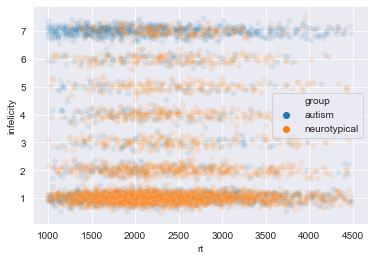

In [9]:

sns.scatterplot(x='rt', y=jitter(df.loc[(df.in_sample==True)&(df.correct == True), 'infelicity'], 0), hue='group', alpha=.1, y_jitter= True, data=df.loc[(df.in_sample==True)&(df.correct == True)])
plt.savefig('./Figures/infelxrt.png', dpi=300)

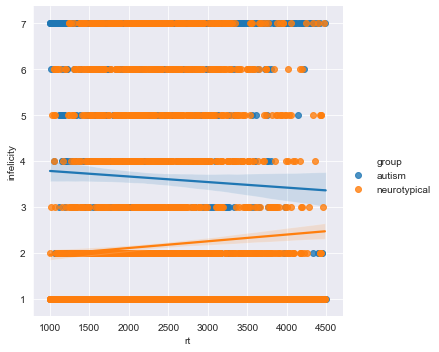

In [8]:
sns.lmplot(x= 'rt', y='infelicity', hue='group', data= df.loc[(df.in_sample==True)&(df.correct == True)])

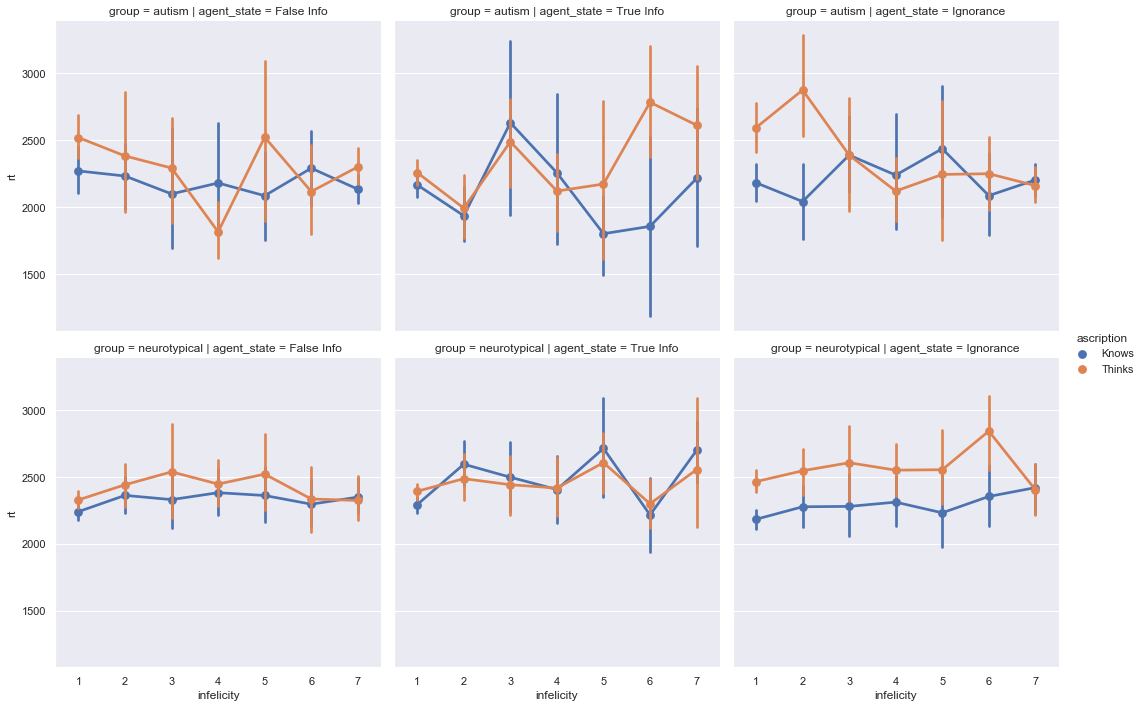

In [34]:
sns.catplot(x='infelicity', y='rt', hue='ascription', col='agent_state', row='group', kind='point', data=df.loc[(df.in_sample == True)& (df.correct==True)]);
plt.savefig('./Figures/felxrt_groupxagentxascrip.png')

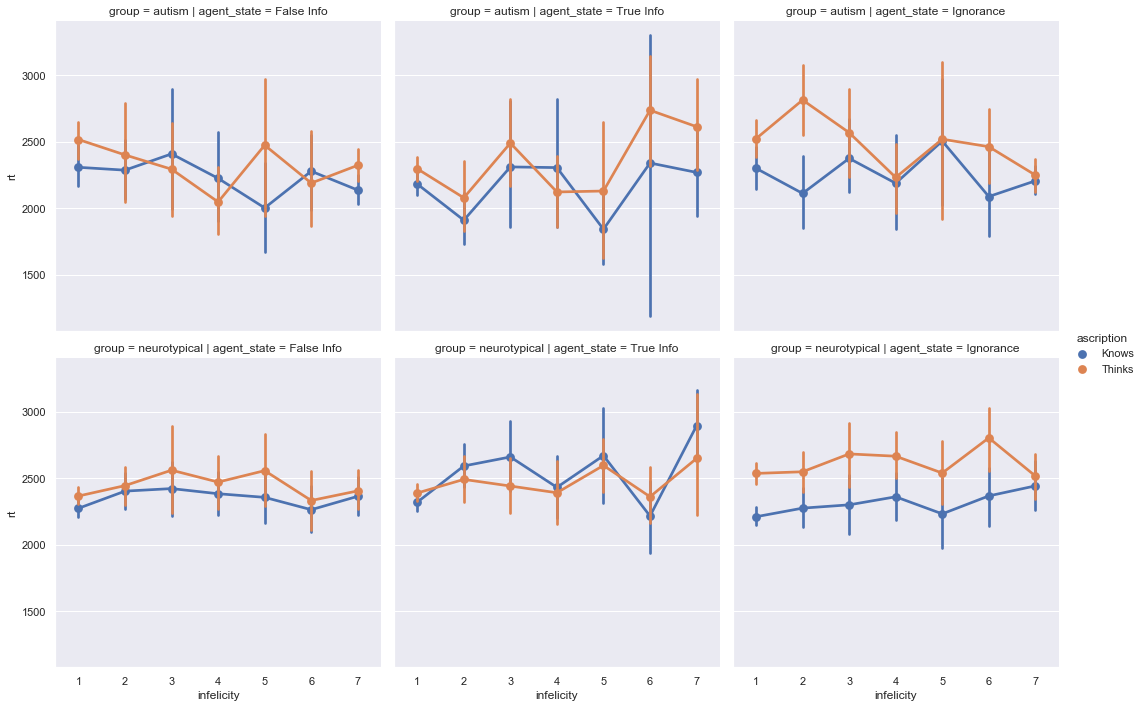

In [38]:
sns.catplot(x='infelicity', y='rt', hue='ascription', col='agent_state', row='group', kind='point', data=df.loc[(df.in_sample == True)&(df.timeout==False)]);
plt.savefig('./Figures/felxrt_groupxagentxascrip.png')


In [14]:
aq = {'rt_thinks':[], 'rt_knows':[], 'pid':[],'rt_diff':[], 'group':[], 'meanRT': [], 'meanInFel':[] }
sorted(list(aq.keys()))

['group', 'meanInFel', 'meanRT', 'pid', 'rt_diff', 'rt_knows', 'rt_thinks']

In [15]:
for subj in tqdm(df.loc[(df.in_sample==True) &(df.timeout == False)].subject.unique()):
    sdat = df.loc[(df.subject == subj) & (df.correct==True) & (df.in_sample==True)]
    tt = sdat.loc[sdat.ascription == 'Thinks'].rt.mean()
    kk = sdat.loc[sdat.ascription == 'Knows'].rt.mean()
    for var, val in zip(sorted(list(aq.keys())), [sdat.group.values[0], sdat.infelicity.mean(), sdat.rt.mean(), subj, tt-kk, kk, tt ]):
        aq[var].append(val)

aqdf = pd.DataFrame(aq)

100%|██████████| 611/611 [00:01<00:00, 361.05it/s]


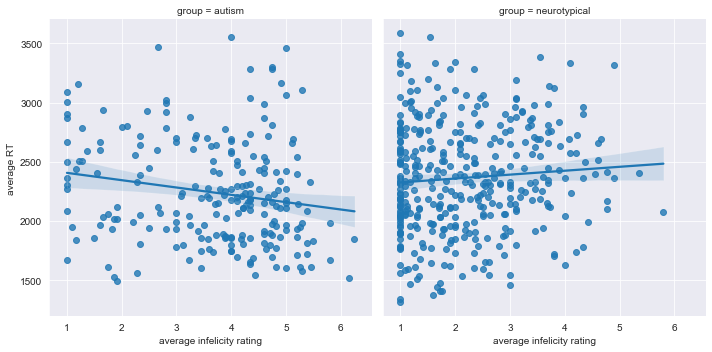

In [16]:
g = sns.lmplot(x='meanInFel', y='meanRT', col='group', data=aqdf);
for aa in [0,1]:
    g.axes[0][aa].xaxis.set_label_text('average infelicity rating');
    g.axes[0][aa].yaxis.set_label_text('average RT');
plt.savefig('./Figures/felxRTxgroup.png', dpi=300)

In [5]:
f_item = {'item':[], 'mRT':[], 'mInfelicity':[], 'group':[], 'agent':[], 'ascription':[]}
sorted(list(f_item.keys()))

['agent', 'ascription', 'group', 'item', 'mInfelicity', 'mRT']

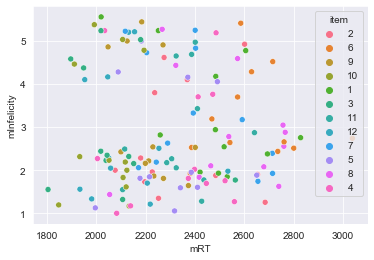

In [6]:
for grp in df.group.unique():
    for ascript in df.ascription.unique():
        for agent in df.agent_state.unique():
            for scenario in df.item.unique():
                idat = df.loc[(df.in_sample == True)&(df.correct == True)&(df.item == scenario)& (df.group == grp) & (df.ascription == ascript) & (df.agent_state == agent)]

                for var, val in zip(sorted(list(f_item.keys())), [agent, ascript, grp, str(scenario), idat.infelicity.mean(), idat.rt.mean()]):
                    f_item[var].append(val)

fel_item = pd.DataFrame(f_item)
sns.scatterplot(x='mRT', y='mInfelicity', hue='item', data=fel_item);


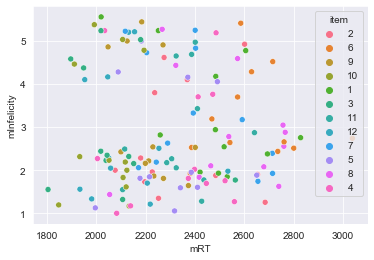

In [7]:
sns.scatterplot(x='mRT', y='mInfelicity', hue='item', data=fel_item);
plt.savefig('./Figures/infelxrtxitem.png', dpi=300)

In [ ]:
sns.catplot(x='mRT', y='mInfelicity', hue='item', kind='strip', col='group', data=fel_item);

In [ ]:
sns.catplot(x='meanRT', y='meanInfel', hue='item', col='group', kind='strip', data=fel_item)

In [ ]:
sns.lmplot(x='rt', y='infelicity', hue='item', col='ascription', row='group', kind='point', data=df.loc[(df.in_sample == True)& (df.correct==True)]);


In [ ]:
sns.pointplot(x='rt', y='infelicity', hue='item',  data=df.loc[(df.in_sample == True)& (df.correct==True)])